# Exercise: Perspective Transform
First, you need to select four points in your "source" image and map them to four points in our "destination" image, which will be the top-down view. You can download an example image like the one shown in the video here. The grid squares on the ground in the simulator represent 1 meter square each so this mapping will also provide us with a distance estimate to everything in the ground plane in the field of view.

Perspective transforms involve some complicated geometry but here you'll use the OpenCV functions cv2.getPerspectiveTransform() and cv2.warpPerspective() to do the heavy lifting (for more on this and other geometric transforms you can do with OpenCV, check out this page). If you followed along with the Environment Setup you should already have OpenCV installed on your machine.

So, you'll want to perform the following steps:

Define 4 source points, in this case, the 4 corners of a grid cell in the image above.
Define 4 destination points (must be listed in the same order as source points!).
Use cv2.getPerspectiveTransform() to get M, the transform matrix.
Use cv2.warpPerspective() to apply M and warp your image to a top-down view.
To perform the first step of selecting source points, you could perform some image analysis to identify lines and corners in the image, but you'll only have to do this once, so it is fine to just select points manually using an interactive matplotlib window.

and plot it in the following manner:

In [23]:
%matplotlib notebook
#%matplotlib qt
# Make some of the relevant imports
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

READ In a calibration Image

<IPython.core.display.Javascript object>


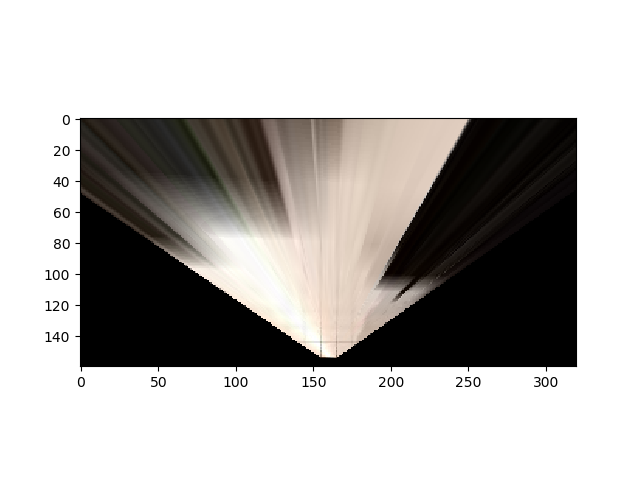

In [24]:
example_grid = './example_grid1.jpg'
image = mpimg.imread(example_grid)
plt.imshow(image)

In an interactive matplotlib window (yours may look different depending on OS and graphics backend, but should have the same features) you can read off the pixel coordinates of the cursor in the lower left-hand corner of the window. You can zoom in on each corner of the grid cell in the image (using the zoom tool in the upper-right) to get a better measurement. Take note of the x and y coordinates of each corner.

# Choosing destination points
With the source points chosen, all that's left is choosing destination points. In this case, it makes sense to choose a square set of points so that square meters in the grid are represented by square areas in the destination image. Mapping a one-square-meter grid cell in the image to a square that is 10x10 pixels, for example, implies a mapping of each pixel in the destination image to a 0.1x0.1 meter square on the ground.

In the next exercise you'll be given the function to do the warping with OpenCV. All you need to do is choose four 
points in the source (original) image, and where they should map to in the destination (output) image. So your job 
is to fill in the source and destination arrays below:

In [26]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# Define source and destination points
example_grid = './example_grid1.jpg'
image = mpimg.imread(example_grid)
bottom_offset=6
dst_size = 5 

source = np.float32([[ 14,140 ], [ 303,141 ], [ 199,96 ], [ 119,96 ]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])

#destination = np.float32([[ 10,0 ], [ 0,0 ], [ 0,10 ], [ 10,10 ]])      
#destination = np.float32([[ 160,10 ], [ 170,10 ], [ 160,20 ], [ 170,20 ]])      
warped = perspect_transform(image, source, destination)
plt.imshow(warped)
plt.show()